<a href="https://colab.research.google.com/github/gustavoSutil/materia-IA/blob/main/deep-learn/t1/t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho T1 - Arquitetura Básica de Redes Neurais

### Este trabalho tem como objetivo a compreensão da arquitetura básica de camadas de neurônios de uma rede neural artificial (RNA). A execução deste exercício permitirá aos estudantes o domínio dos métodos necessários para o treinamento e teste de uma RNA utilizando um dataset pré-processado.
## Instruções

#### O estudante deve treinar uma RNA com camadas densas e estilo feedforward para uma tarefa de classificação utilizando dataset pré-processado conforme especificado abaixo.
Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.
Para este trabalho, somente serão permitidas somente as seguintes bibliotecas python para o treinamento da RNA: numpy, scipy, tensorflow,  scikit-learn. Para visualização e criação de gráficos, também serão permitidas matplotlib, seaborn, plotly, yellowbrick.
Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.
### Limitações:
#### Utilize somente camadas do tipo Dense e otimizador SGD. Não utilize regularização, regimes de learning rate, dropout ou early stop. As funções de ativação devem ser escolhidas dentre sigmoid, tanh, relu e softmax.
### Entrega
O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.
A entrega da atividade será on-line através do SIGAA. Cada estudante ou dupla deve enviar um único arquivo ZIP contendo o arquivo jupyter utilizado para implementação do trabalho. O arquivo ZIP deve ser nomeado com a matrícula do estudante ou com as matrículas dos integrantes da dupla.
Data limite para entrega: 01/10/2023, 23h59m.
https://colab.research.google.com/drive/1okhy4prxdhO6ixxH1Ag3mJjPUoUS4N8k?usp=sharing
### Avaliação
A avaliação se dará pelas anotações incluídas no arquivo jupyter notebook contendo a lógica de cada arquitetura e a avaliação dos resultados, pela criatividade na análise dos resultados da rede neural, e pelo esmero na escrita das notas.
IV Atividades

## Treine uma rede neural artificial para classificar as imagens do dataset Fashion Mnist dividido em apenas duas classes:
* Top: label 1. Contém todas as vestimentas presentes no dataset que se usam na parte superior do corpo humano: T-shirt/top, Pullover, Dress, Coat e Shirt.
* NonTop: label 0. Contém todas as demais vestimentas: Trouser, Sandal, Sneaker, Bag e Ankle boot.
* Utilize somente as bibliotecas especificadas na Seção I.
* Para cada tentativa de construção de arquitetura:
* Mantenha um registro da tentativa e resultado obtido pela rede.
* Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.
* Utilize células de texto para incluir as suas anotações. Utilize-se de gráficos, matrizes de confusão, métricas, etc, para subsidiar suas conclusões.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)
print(tf.version.VERSION)

2.14.0


# Treino

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


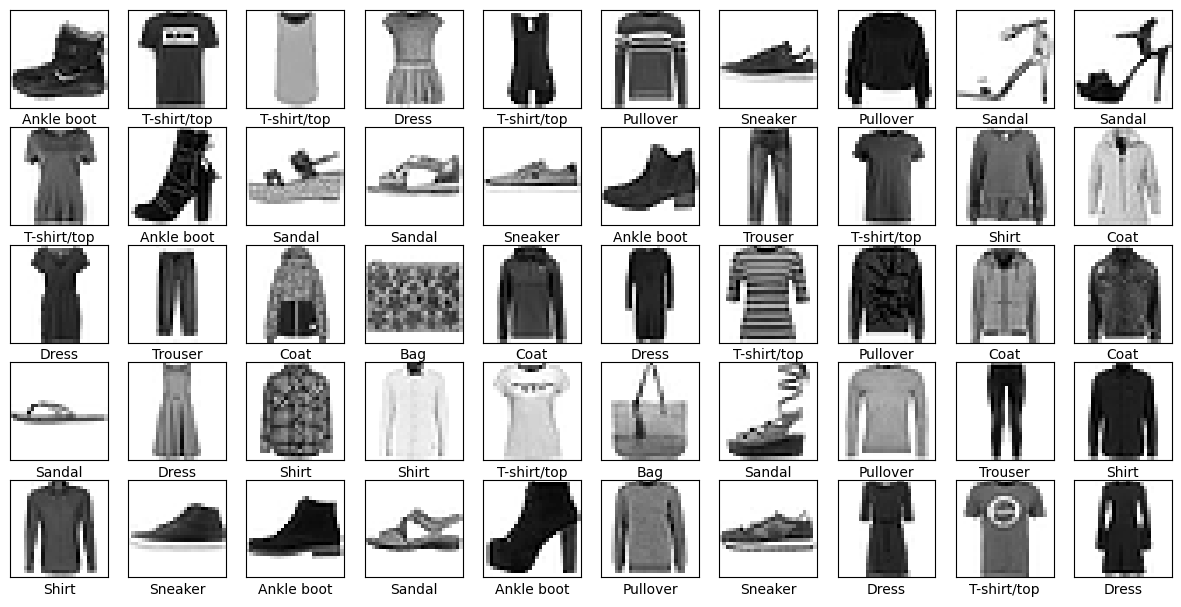

In [3]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

In [8]:
x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 ## pre-processamento dos dados
x_test /= 255 ## pre-processamento dos dados

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)

60000 exemplos de treino
10000 exemplos de teste


# Inicialização da implementação:

### Ainda preciso:
* Especificar a função de ativação
* Especificar a quantidade de neurônios
* Especificar da função de perda escolha (se usar)
* Especificara o otimizador
* treinar com o fit